In [1]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

/Users/Alexander/Virtualenvs/ml-data-processing/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('datasets/position_salaries.csv')
# the first column is a text field which directly corrosponds to the second column, it is
# therefore not used. For regressors we need the dependant variables to be in a matrix, 
# the upperbound is ignored so therefore we can do 1:2. For the independenant variable we
# want an array of values.
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


In [3]:
# since our data is so small, we are not going to use any train/test split.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [4]:
# first we fit a straight line, to see how well our polynomial performs compared to it.
linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(X, y)

/Users/Alexander/Virtualenvs/ml-data-processing/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [5]:
# now we add a polynomial to our dataset, so we can use it in our LinearRegression regressor.
# PolynomialFeatures adds the intercept and x1^2 to the n-th degree. We have to be careful for
# overfitting though...
polynomial_features = PolynomialFeatures(degree=4)
X_polynomial = polynomial_features.fit_transform(X)
polynomial_regressor = LinearRegression()
polynomial_regressor = polynomial_regressor.fit(X_polynomial, y)

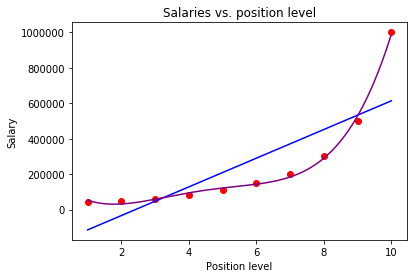

In [7]:
# first we reshape our job levels to multiple steps, since it's linear anyway, so we get more
# detail in our model.
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# now we visualise both regressor to see the differences easily.
plot.title('Salaries vs. position level')
plot.xlabel('Position level')
plot.ylabel('Salary')
plot.scatter(X, y, color='red')
plot.plot(X, linear_regressor.predict(X), color='blue')
plot.plot(X_grid, polynomial_regressor.predict(polynomial_features.fit_transform(X_grid)), color='purple')
plot.show()